
# DESC SN Ia metric # 

# u/pgris/nsnmetric  gamma_WFD.hdf5 with proper dust extinction#

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import pandas as pd

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import time

In [2]:
# Baseline Survey
baseline_file = 'shave_25_v2.1_10yrs.db' #get_baseline()
runName = os.path.split(baseline_file)[-1].replace('.db', '')

print(runName)

shave_25_v2.1_10yrs


In [3]:
# Set up output
outDir = 'sn'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [4]:
plotDict = {'percentileClip': 95., 'nTicks': 5}

sne_nside = 2
sn_summary = [maf.MedianMetric(), maf.MeanMetric(),
              maf.SumMetric(metricName='Total detected')]
slicer = maf.HealpixSlicer(nside=sne_nside, useCache=False)
metric = maf.SNNSNMetric(verbose=False, gammaName='gamma_WFD.hdf5')  
bundle = maf.MetricBundle(metric, slicer, None, plotDict=plotDict, 
                        summaryMetrics=sn_summary)

bg = maf.MetricBundleGroup({'sn': bundle}, baseline_file, outDir, resultsDb)

Healpix slicer using NSIDE=2, approximate resolution 1758.969043 arcminutes
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 62322 799 78
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 72709 799 91
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading

Querying table None with no constraint for columns ['night', 'fieldRA', 'observationId', 'filter', 'visitTime', 'observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'numExposures', 'rotSkyPos', 'visitExposureTime'].
Found 2383592 visits
Running:  ['sn']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 2 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:584: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


Plotting complete.
runtime= 816.3613667488098 s


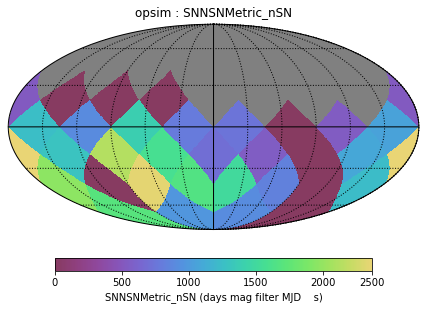

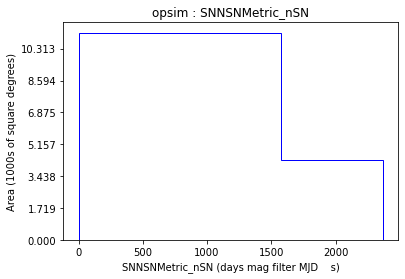

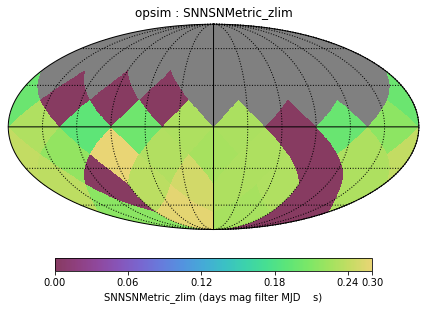

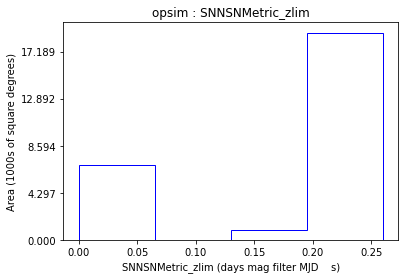

In [5]:
t1 = time.time()
bg.runAll()     
t2 = time.time()
bg.plotAll(closefigs=False)
print('runtime=', t2-t1, 's')

In [6]:
bundle.metricValues.compressed()[0]

rec.array([(0., 0.)],
          dtype=[('nSN', '<f8'), ('zlim', '<f8')])

In [7]:
# The 'reduce' values of the metric got stored in the bundle dict in the bungle group 
bg.bundleDict

{'sn': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7f9aa48eda00>,
 'SNNSNMetric_nSN': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7f9aa38b6c70>,
 'SNNSNMetric_zlim': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7f9a5cdc06a0>}

In [8]:
# The nSN and zlim values are pulled out in those reduce methods, into their own bundles.
bdict = bg.bundleDict
print(bdict['SNNSNMetric_nSN'].metricValues.compressed())
np.median(bdict['SNNSNMetric_nSN'].metricValues.compressed())

[   0.          0.          0.        529.885397  791.794128 1388.565801
  897.614158 1253.782733 1058.632391  539.311059    0.        746.861897
  695.373252 1577.073371 2127.615548 1291.532392 2453.310319 1088.348927
    0.        549.726058 1656.398779 2343.313117    0.       1970.063984
 1238.215718    0.        839.287125 1510.871405  974.979929 1696.616793
    0.        913.770151]


905.6921545

In [9]:
bdict['SNNSNMetric_zlim'].metricValues.compressed()

array([0.       , 0.       , 0.       , 0.198823 , 0.231296 , 0.2010415,
       0.191123 , 0.232595 , 0.215764 , 0.1972025, 0.       , 0.229708 ,
       0.227658 , 0.2326515, 0.2689535, 0.219101 , 0.2413515, 0.231259 ,
       0.       , 0.231595 , 0.247972 , 0.236803 , 0.       , 0.2386345,
       0.231425 , 0.       , 0.232136 , 0.231115 , 0.257448 , 0.215259 ,
       0.       , 0.22787  ])